# Introduction to the Argone float location forecast API

Argovis provides an API that indexes and distributes Argo float location forecast data provided by [citation needed]. The schema for these data is similar, but not identical, to many of our other products; this notebook will highlight some of the details specific to this dataset.

## Setup: Register an API key

In order to allocate Argovis's limited computing resources fairly, users are encouraged to register and request a free API key. This works like a password that identifies your requests to Argovis. To do so:

 - Visit [https://argovis-keygen.colorado.edu/](https://argovis-keygen.colorado.edu/)
 - Fill out the form under _New Account Registration_
 - An API key will be emailed to you shortly.
 
Treat this API key like a password - don't share it or leave it anywhere public. If you ever forget it or accidentally reveal it to a third party, see the same website above to change or deactivate your token.

Put your API key in the quotes in the variable below before moving on:

In [1]:
API_ROOT='https://argovis-api.colorado.edu/'
API_KEY=''

from argovisHelpers import helpers as avh
import xarray, pandas

import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

# Float location forecast data structure

Let's begin by looking at a float location forecast document. The `forecastOrigin` key will query the forecast for a float starting at the provided longitude, latitude string, in this case `x0,y0`

In [2]:
# Paul C.' paper
x0 = 22
y0 = -44
# x0 = -130 #22
# y0 = 32 #-44

flfSearch = {
    'forecastOrigin': str(x0) + ',' + str(y0),
    'data': 'all'
}

flf = avh.query('argone', options=flfSearch, apikey=API_KEY, apiroot=API_ROOT)
flf[1]

{'_id': '22_-44_24.0_-42.0',
 'metadata': ['argone'],
 'geolocation': {'type': 'Point', 'coordinates': [22, -44]},
 'geolocation_forecast': {'type': 'Point', 'coordinates': [24, -42]},
 'data': [[0.028571428571428577],
  [0.014710588299395104],
  [0.009351343578152089],
  [0.00589899963455638],
  [0.0039799151915137785],
  [0.002804146487713185],
  [0.0020765777548718573],
  [0.0016263577818075943],
  [0.0013443884987935741],
  [0.0011628325893298147],
  [0.0010364190410971936],
  [0.000951379086354582],
  [0.0008866986526338681],
  [0.0008372467539655549],
  [0.000797430682710675],
  [0.0007629238108195161],
  [0.0007331625096557775],
  [0.000706710105801801],
  [0.0006821935919922241],
  [0.000661199048205878]],
 'data_info': [['90',
   '180',
   '270',
   '360',
   '450',
   '540',
   '630',
   '720',
   '810',
   '900',
   '990',
   '1080',
   '1170',
   '1260',
   '1350',
   '1440',
   '1530',
   '1620',
   '1710',
   '1800'],
  ['units'],
  [[None],
   [None],
   [None],
   [None

We get an array of documents like the one illustrated above. These documents follow the conventions of Argovis' gridded documents, with the following modifications:

 - `geolocation` specifies the location of the float at the beginning of the forecast. Valid locations are lattice points of a 2 degree square grid centered on 0,0.
 - `geolocation_forecast` specifies the location of the float at the end of the forecast. These are populated over the same 2 degree grid as `geolocation`.
 - No `timestamp` key is present: these forecasts do not take into account seasonal or long term variations, and so have no meaningful timestamp to associate with them.
 - Data variables cover [90,1800] in steps of 90, and indicate number of days each forecast point covers. For example, if x0 = 22 and y0 = -44 were indicated in the previous code cell (as origin of interest), the above document indicates that a float initially at x0,y0 will have a 2.857% chance of being found in the 24,-42 grid cell after 90 days, or 0.066% after 1800 days.
 
The array of documents `flf` found above contains a document for every possible destination endpoint, for all 20 timesteps. The `argone` endpoint supports the same `data` query string behavior as other Argovis API endpoints (as always, see [https://argovis-api.colorado.edu/docs/](https://argovis-api.colorado.edu/docs/) for always-up-to-date API documentation for all routes). For example, let's get only the 90 day forecast:

In [3]:
flfSearch90 = {
    'forecastOrigin': str(x0) + ',' + str(y0),
    'data': '90'
}

flf90 = avh.query('argone', options=flfSearch90, apikey=API_KEY, apiroot=API_ROOT)
flf90[1]

{'_id': '22_-44_24.0_-42.0',
 'metadata': ['argone'],
 'geolocation': {'type': 'Point', 'coordinates': [22, -44]},
 'geolocation_forecast': {'type': 'Point', 'coordinates': [24, -42]},
 'data': [[0.028571428571428577]],
 'data_info': [['90'], ['units'], [[None]]]}

We can also look backwards in time by querying all documents that have an endpoint of a given longitude, latitude with `forecastGeolocation`:

In [4]:
flfSearchReverse = {
    'forecastGeolocation':'24,-42',
    'data': 'all'
}

flfReverse = avh.query('argone', options=flfSearchReverse, apikey=API_KEY, apiroot=API_ROOT)
flfReverse[1]

{'_id': '-90_-56_24.0_-42.0',
 'metadata': ['argone'],
 'geolocation': {'type': 'Point', 'coordinates': [-90, -56]},
 'geolocation_forecast': {'type': 'Point', 'coordinates': [24, -42]},
 'data': [[None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [None],
  [0.00010499539873719],
  [0.00024041753171309148],
  [0.0003787248381617915],
  [0.0005055899832310555],
  [0.000620739027433694]],
 'data_info': [['90',
   '180',
   '270',
   '360',
   '450',
   '540',
   '630',
   '720',
   '810',
   '900',
   '990',
   '1080',
   '1170',
   '1260',
   '1350',
   '1440',
   '1530',
   '1620',
   '1710',
   '1800'],
  ['units'],
  [[None],
   [None],
   [None],
   [None],
   [None],
   [None],
   [None],
   [None],
   [None],
   [None],
   [None],
   [None],
   [None],
   [None],
   [None],
   [None],
   [None],
   [None],
   [None],
   [None]]]}

Let's also have the metadata for these data documents on hand:

In [5]:
flfMeta = avh.query('argone/meta', options={'id':'argone'}, apikey=API_KEY, apiroot=API_ROOT)
flfMeta

[{'_id': 'argone',
  'data_type': 'covariance',
  'data_info': [['90',
    '180',
    '270',
    '360',
    '450',
    '540',
    '630',
    '720',
    '810',
    '900',
    '990',
    '1080',
    '1170',
    '1260',
    '1350',
    '1440',
    '1530',
    '1620',
    '1710',
    '1800'],
   ['units'],
   [[None],
    [None],
    [None],
    [None],
    [None],
    [None],
    [None],
    [None],
    [None],
    [None],
    [None],
    [None],
    [None],
    [None],
    [None],
    [None],
    [None],
    [None],
    [None],
    [None]]],
  'date_updated_argovis': '2023-02-08T21:37:00.000Z',
  'levels': [0],
  'source': [{'source': ['ARGONE'],
    'doi': 'https://doi.org/10.1175/JTECH-D-22-0070.1'}],
  'level_units': 'dbar'}]

We can also fairly easily turn this information into an xarray data set, and plot it:

In [6]:
def flfgrid(originlist):
    # given a list of documents from the argovis float location forecast API for a single float origin,
    # return an xarray object representing this data:

    lon = []
    lat = []
    forecastDays = []
    prob = []
    for doc in originlist:
        for i,v in enumerate(doc['data']):
            lon.append(doc['geolocation_forecast']['coordinates'][0])
            lat.append(doc['geolocation_forecast']['coordinates'][1])
            forecastDays.append(int(flfMeta[0]['data_info'][0][i]))
            prob.append(v[0])
            
    df = pandas.DataFrame({"latitude": lat, 
                           "longitude": lon, 
                           "forecastDays": forecastDays, 
                           "probability": prob
                          }).set_index(["latitude","longitude","forecastDays"])
    return df.to_xarray()
    

In [7]:
ds = flfgrid(flf)

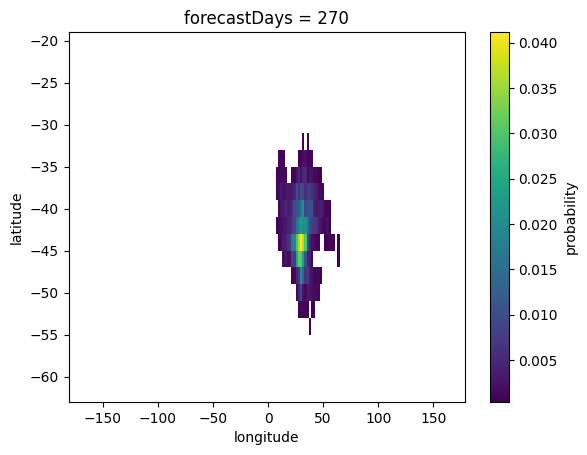

In [8]:
deltat_forecast = 270
gridmap = ds.loc[{"forecastDays":deltat_forecast}]
fig = gridmap['probability'].plot()

Or, we could turn it into numpy arrays and plot on a map (please note the x0, y0 origin we selected is indicated as a black star):

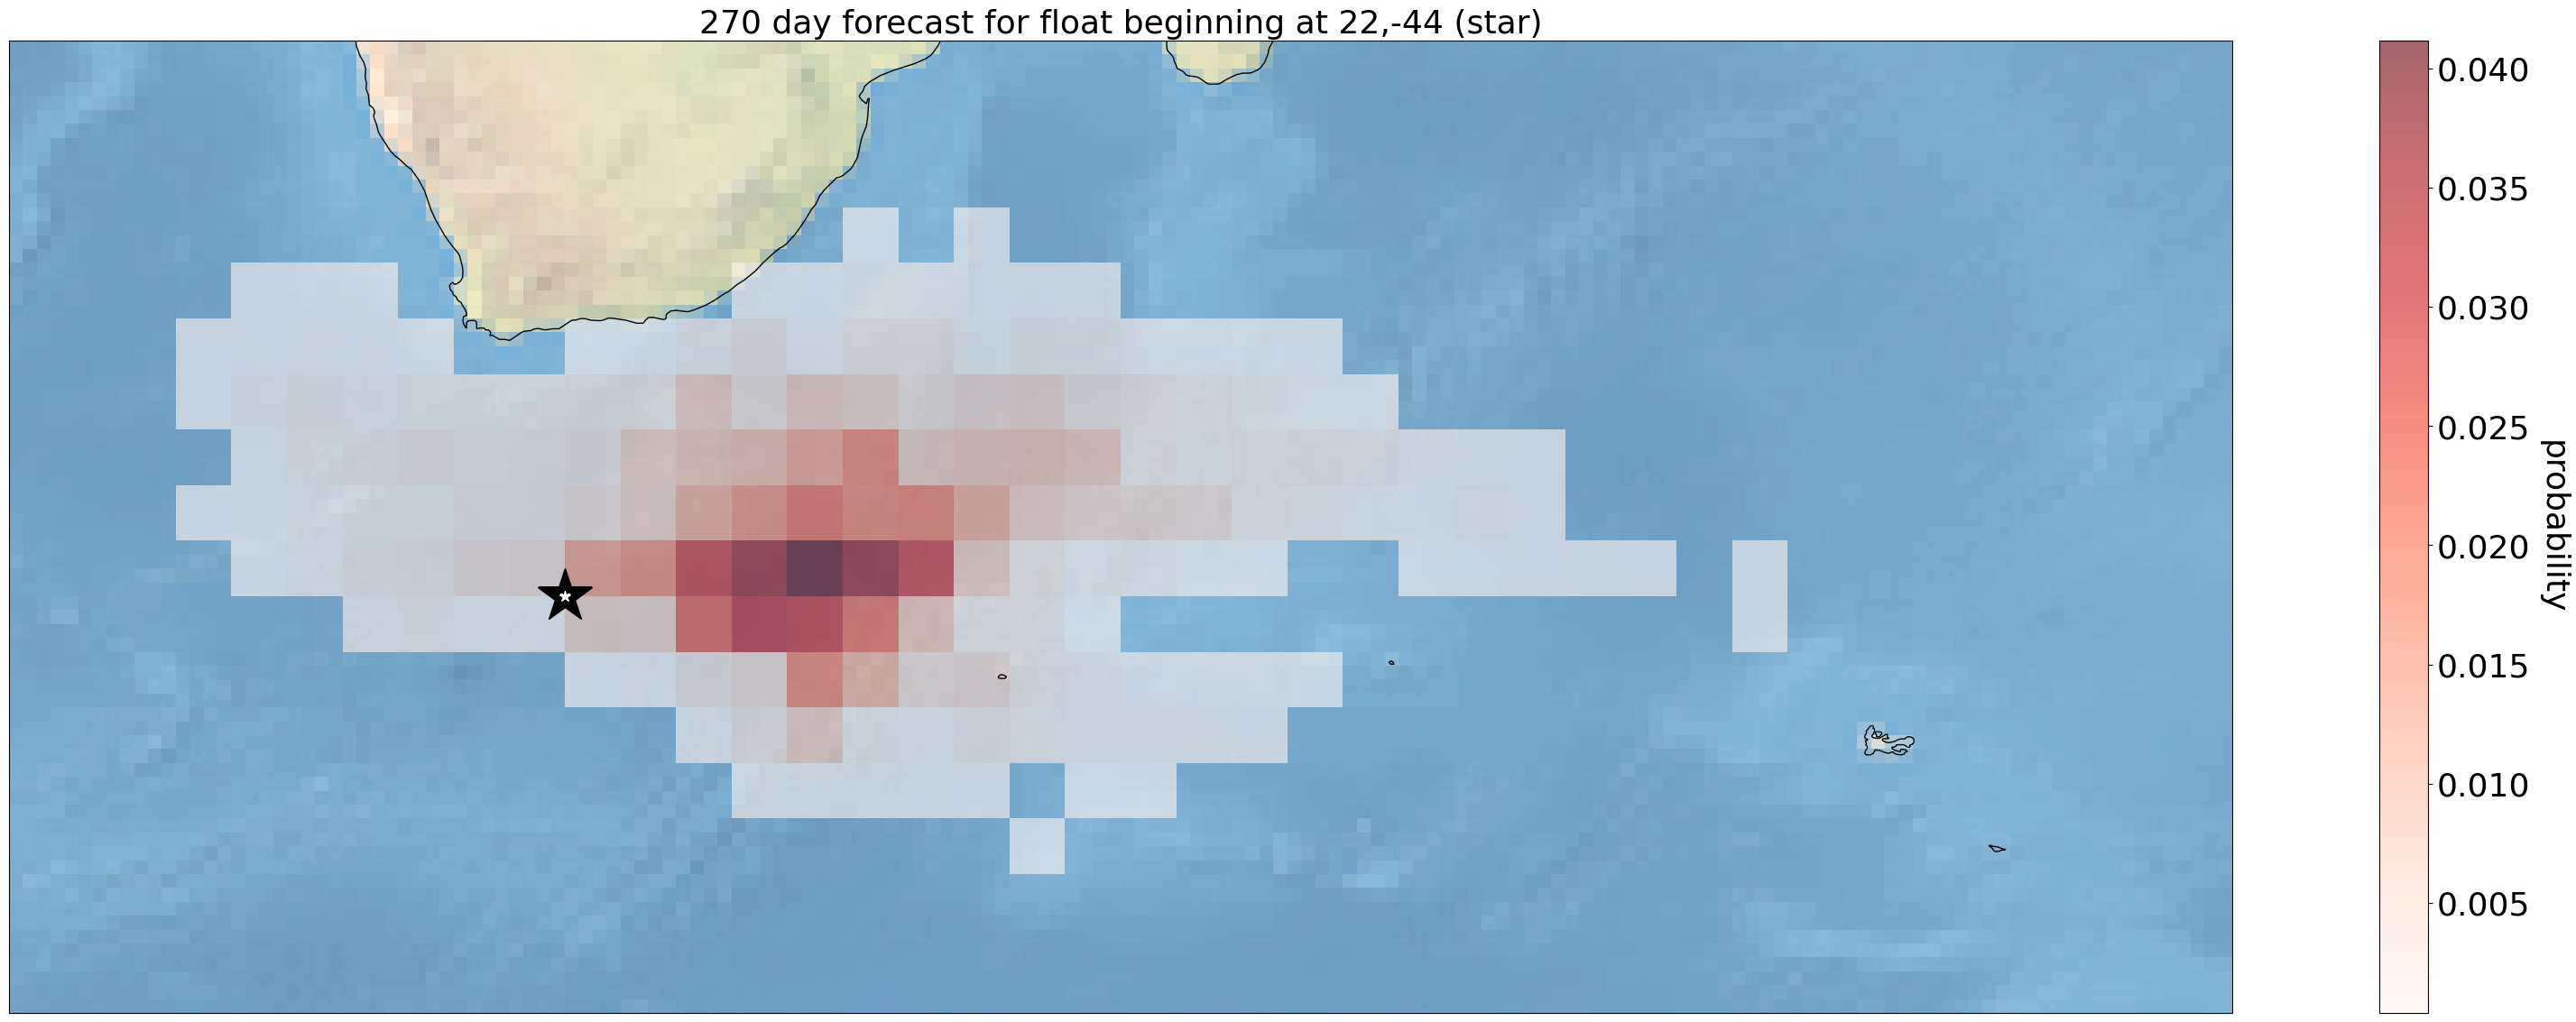

In [9]:
dlon = 2
dlat = 2

fnt_sz = 26

lon_edges = np.arange(-180,180+dlon,dlon)
lat_edges = np.arange(-90,90+dlat,dlat)

c = np.zeros((len(lat_edges),len(lon_edges)))
c[:] = None

def coord2bin(longitude, latitude):
    lonbin = np.argmax(lon_edges>longitude)
    latbin = np.argmax(lat_edges>latitude)
    return (latbin-1, lonbin-1)

for doc in flf:
    dest_long = doc['geolocation_forecast']['coordinates'][0]
    dest_lat = doc['geolocation_forecast']['coordinates'][1]
    coords = coord2bin(dest_long, dest_lat)
    c[coords[0], coords[1]] = doc['data'][flfMeta[0]['data_info'][0].index(str(deltat_forecast))][0]

fig = plt.figure(figsize=(42, 14))
ax = plt.axes(projection=ccrs.PlateCarree())
plt.pcolormesh(lon_edges+dlon/2, lat_edges+dlat/2, c, transform=ccrs.PlateCarree(),cmap='Reds',
              alpha=.6)
cbar = plt.colorbar()
cbar.set_label('probability', rotation=270,fontsize=fnt_sz, labelpad=30)
cbar.ax.tick_params(labelsize=fnt_sz)

plt.plot(x0,y0,'*',markersize=15*3, color='k', transform=ccrs.PlateCarree())
plt.plot(x0,y0,'*',markersize=3*3, color='w', transform=ccrs.PlateCarree())

plt.title(str(deltat_forecast) + ' day forecast for float beginning at ' + str(x0) + ',' + str(y0) + ' (star)',
          fontsize=fnt_sz)
ax.stock_img()
ax.coastlines()
ax.set_extent([x0-20, x0+60, y0-15, y0+20], crs=ccrs.PlateCarree())
plt.show()